#### Import Libraries and Dataset

In [11]:
#Libraries and environment
import os
os.chdir(r'C:\Users\MAIN\Desktop\Data Science intern File')
os.getcwd()

#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.interactive(False)
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline
from pylab import rcParams

In [12]:
#import dataset
df = pd.read_csv("data.csv", na_values= " ")

C:\Users\MAIN\AnacondaProjects\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
#basic dataset exploration
print(df.head(n=5)) 
print(df.describe())  
print(df.shape)  #dataframe shape
print(df.dtypes)  #dtatypes of the individual columns

         fullVisitorID  visitNumber      date  bounces  hits  pageviews  \
0  8533875475515924645            1  20170205      1.0     1        1.0   
1  4874599869430831185            2  20170205      1.0     1        1.0   
2   361954421372951638            1  20170205      1.0     1        1.0   
3  8751850432978942600            2  20170205      1.0     1        1.0   
4  2451058030378352110            1  20170205      1.0     1        1.0   

   timeOnSite  transactionRevenue  transactions    source channelGrouping  \
0         NaN                 NaN           NaN  (direct)  Organic Search   
1         NaN                 NaN           NaN  (direct)  Organic Search   
2         NaN                 NaN           NaN  (direct)  Organic Search   
3         NaN                 NaN           NaN      bing  Organic Search   
4         NaN                 NaN           NaN  (direct)  Organic Search   

  browser deviceCategory        country                           city  
0  Chrome    

## Exploratory Data Analysis

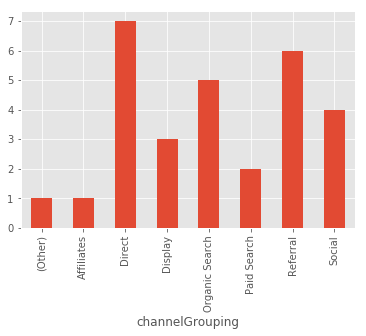

In [17]:
#Channel with the highest number of transactions
df.groupby('channelGrouping')['transactions'].nunique().plot(kind='bar')
plt.show()

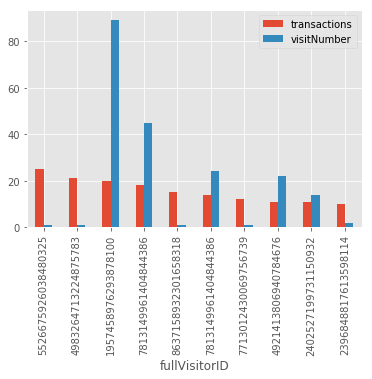

In [19]:
#Top visitors with highest transaction numbers and number of visits. No strong correlation between sum transactions and number of visits
df.groupby(['fullVisitorID']).agg({'transactions':'sum', 'visitNumber':'count'}).sort_values(by= ['transactions','visitNumber'], ascending=False)[:10].plot(kind='bar')

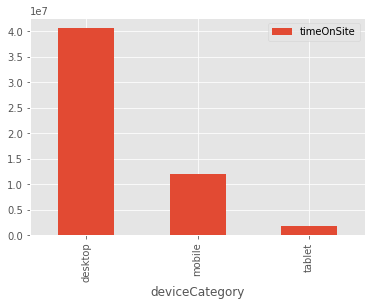

In [20]:
#Device type with highest average timeOnsite
#there is a need to optimise the website mobile and tablet view so its easier to scroll through the products online annd 
df.groupby(['deviceCategory']).agg({'timeOnSite':'sum'}).sort_values(by= ['timeOnSite'], ascending=False).plot(kind='bar')
plt.show()

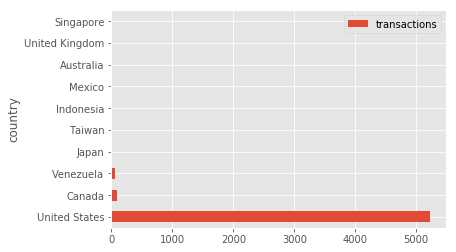

In [21]:
#Top countries with highest transaction numbers
df.groupby(['country']).agg({'transactions':'sum'}).sort_values(by= ['transactions'], ascending=False)[:10].plot(kind='barh')

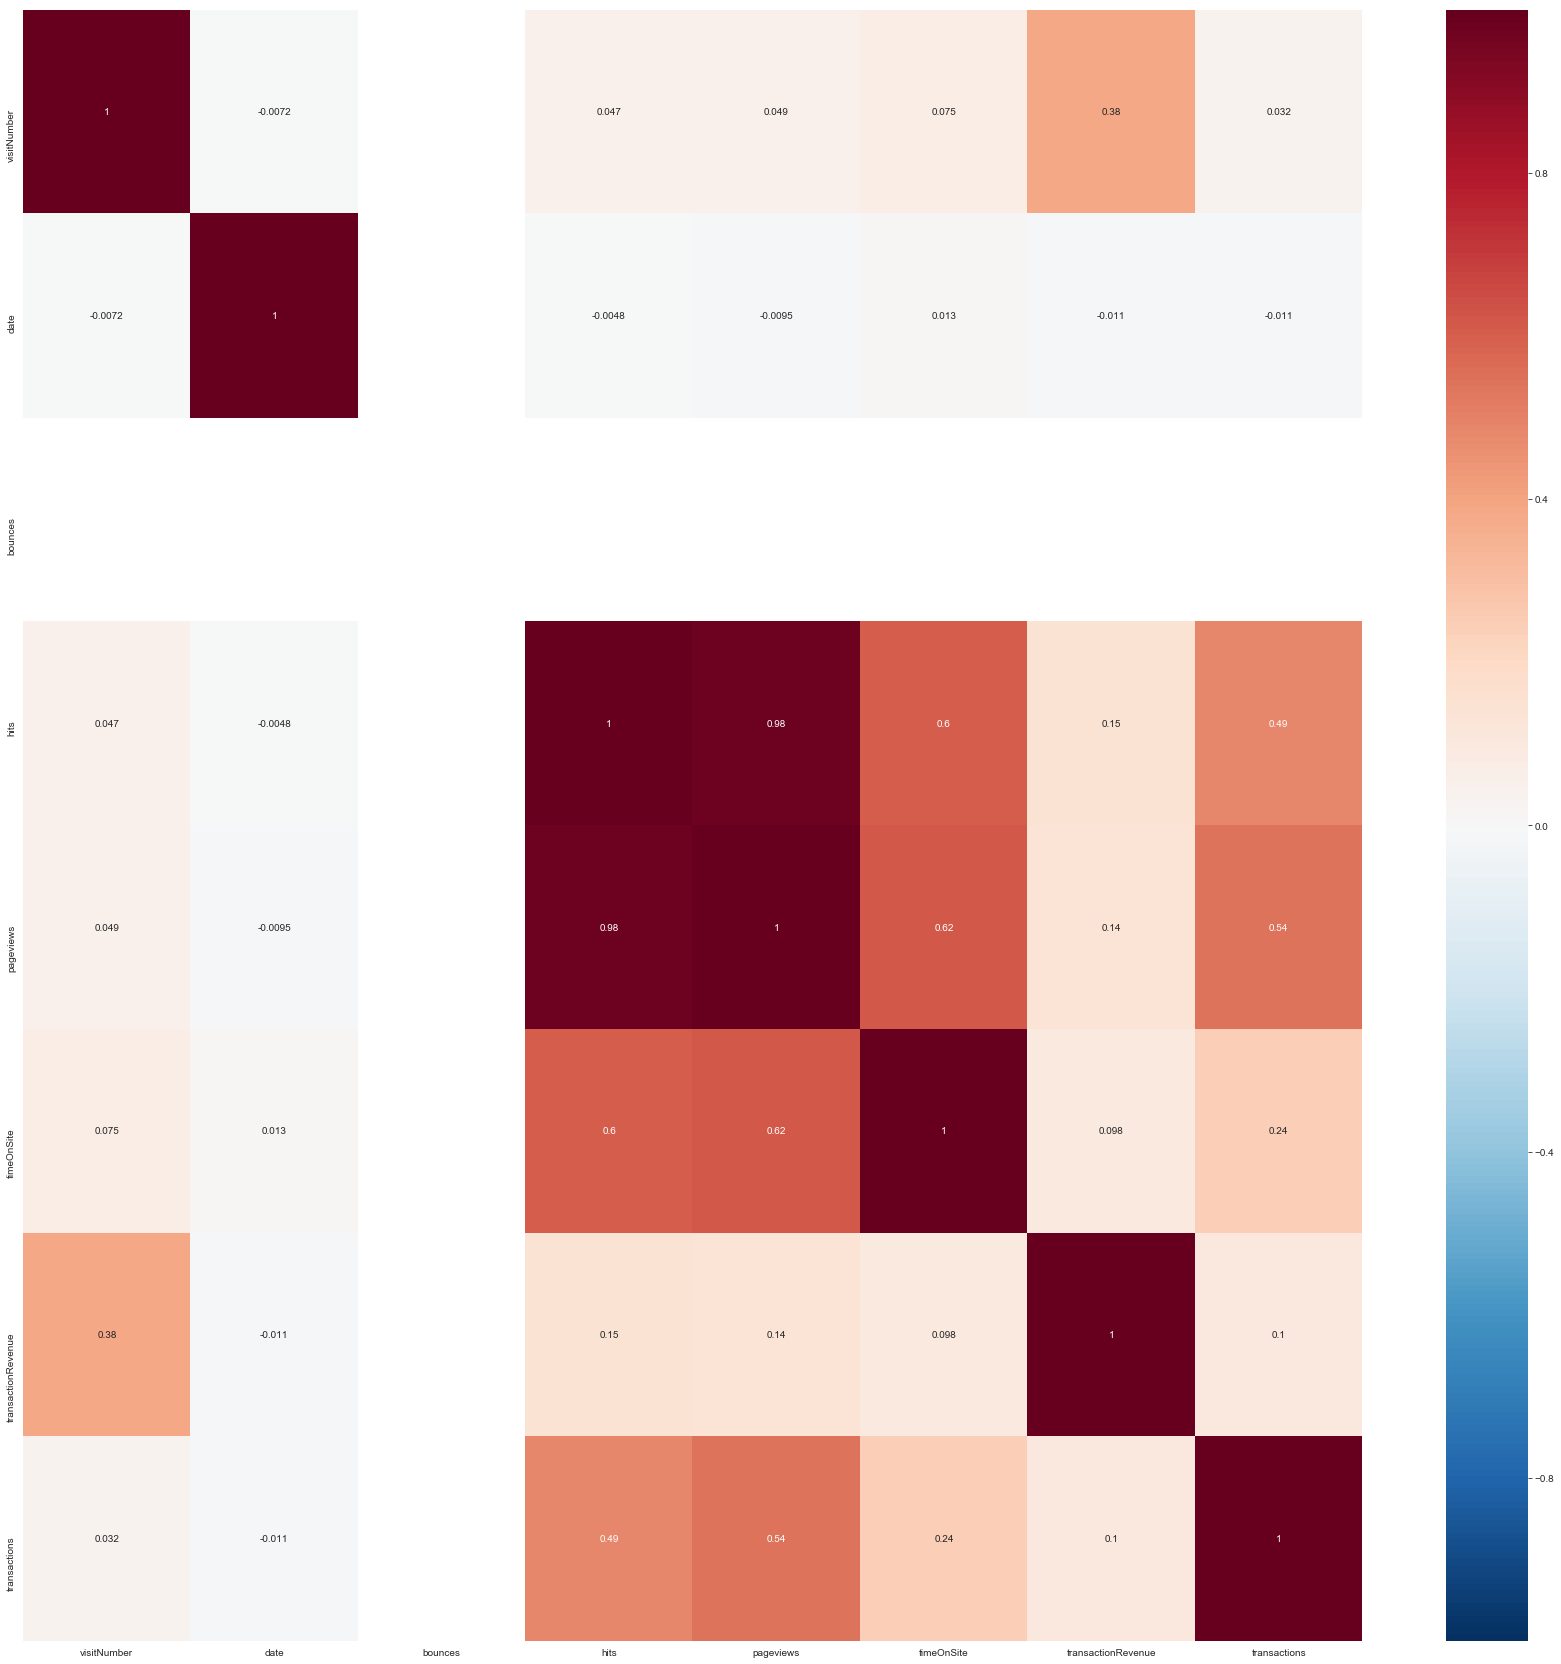

In [22]:
#check correlation with seaborn heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

## Modeling

#### check missing values for each column

In [23]:
df.isnull().sum().sort_values(ascending=False)

transactions          387615
transactionRevenue    387615
bounces               196928
timeOnSite            196493
pageviews                 36
city                       0
country                    0
deviceCategory             0
browser                    0
channelGrouping            0
source                     0
hits                       0
date                       0
visitNumber                0
fullVisitorID              0
dtype: int64

#### Handling missing values
fill the transacion and transactionRevenue with 0. this is because we want to run a logistic regression on the conversion 
and the transaction column will be used to create the conversion column. The transactionRevenue column missing values matches
that of the tranactions showing the abscence of transactions resulted in abscence of revenue. therefore we fill 
the transactionRevenue with 0. We fill the pageviews column with the mean of the values since the number of missing values
is very negligible. We also fill the missing values of bounces and the timeOnSite missing values with 0.

In [24]:
df.head()

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city
0,8533875475515924645,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney
1,4874599869430831185,2,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul
2,361954421372951638,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow
3,8751850432978942600,2,20170205,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset
4,2451058030378352110,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset


In [25]:
df['transactions'] = df['transactions'].fillna(0)
df['transactionRevenue'] = df['transactionRevenue'].fillna(0)
df['bounces'] = df['bounces'].fillna(0)
df['timeOnSite'] = df['timeOnSite'].fillna(0)
df['pageviews'].fillna(int(df['pageviews'].mean()), inplace=True)
df.isnull().sum().sort_values(ascending=False)

city                  0
country               0
deviceCategory        0
browser               0
channelGrouping       0
source                0
transactions          0
transactionRevenue    0
timeOnSite            0
pageviews             0
hits                  0
bounces               0
date                  0
visitNumber           0
fullVisitorID         0
dtype: int64

In [26]:
df.shape

(392892, 15)

#### Feature engineering

create a new column to show if there is conversion from the web visit and session.

In [27]:
df['conversion'] = np.where(df.transactions > 0, 1, 0)
df.conversion.value_counts()

0    387615
1      5277
Name: conversion, dtype: int64

In [29]:
df.shape

(392892, 16)

##### Drop a column. The index column is not useful in the analysis. 

In [30]:
df = df.drop(['fullVisitorID'], axis=1)  #column is an index column and is not useful in the analysis

##### Mapping of categorical variables

In [31]:
#Mapping Categorical variables
df.deviceCategory = df.deviceCategory.map({'desktop':0,'mobile':1, 'tablet':2})

In [32]:
df.head(n=5)

,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city,conversion
0,1,20170205,1.0,1,1.0,0.0,0.0,0.0,(direct),Organic Search,Chrome,0,Australia,Sydney,0
1,2,20170205,1.0,1,1.0,0.0,0.0,0.0,(direct),Organic Search,Chrome,1,Turkey,Istanbul,0
2,1,20170205,1.0,1,1.0,0.0,0.0,0.0,(direct),Organic Search,Chrome,0,Russia,Moscow,0
3,2,20170205,1.0,1,1.0,0.0,0.0,0.0,bing,Organic Search,Edge,0,United States,not available in demo dataset,0
4,1,20170205,1.0,1,1.0,0.0,0.0,0.0,(direct),Organic Search,Chrome,0,Indonesia,not available in demo dataset,0


###### Label encode categorical variables

In [33]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['source'] = lb.fit_transform(df['source'])
df['browser'] = lb.fit_transform(df['browser'])
df['country'] = lb.fit_transform(df['country'])
df['city'] = lb.fit_transform(df['city'])
df['channelGrouping'] = lb.fit_transform(df['channelGrouping'])
df.head(n=5)

,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city,conversion
0,1,20170205,1.0,1,1.0,0.0,0.0,0.0,0,4,9,0,11,366,0
1,2,20170205,1.0,1,1.0,0.0,0.0,0.0,0,4,9,1,195,167,0
2,1,20170205,1.0,1,1.0,0.0,0.0,0.0,0,4,9,0,159,244,0
3,2,20170205,1.0,1,1.0,0.0,0.0,0.0,19,4,13,0,203,415,0
4,1,20170205,1.0,1,1.0,0.0,0.0,0.0,0,4,9,0,90,415,0


In [34]:
#split data into X and Y
X=df.drop(['conversion'],axis=1)
y=df.conversion

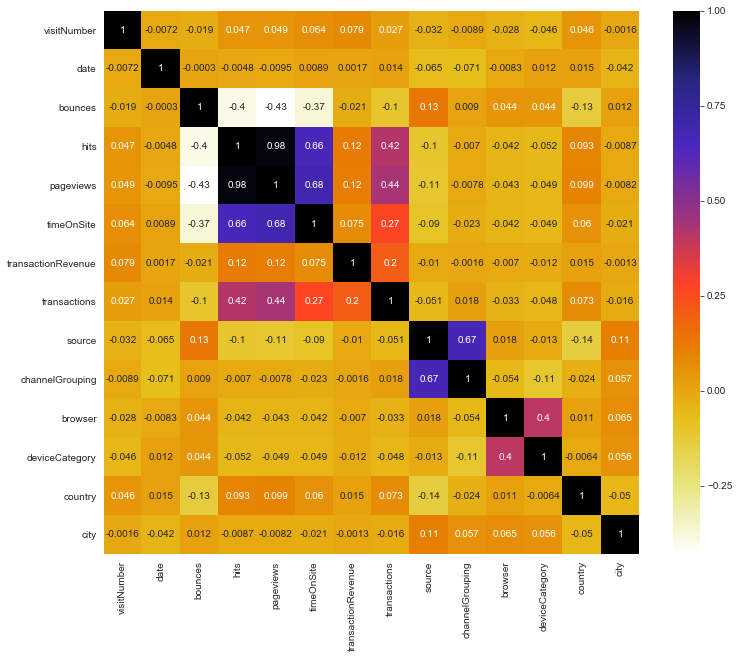

In [35]:
#Use Pearson Correlation to drop features from the X independent variables
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [36]:
#with the following function we select highly correlated features and remove the first feature that is correlated with any other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [37]:
corr_features = correlation(X, 0.70)
len(set(corr_features))

1

In [38]:
corr_features

{'pageviews'}

In [39]:
X = X.drop(corr_features,axis=1)

In [40]:
X.dtypes

visitNumber             int64
date                    int64
bounces               float64
hits                    int64
timeOnSite            float64
transactionRevenue    float64
transactions          float64
source                  int32
channelGrouping         int32
browser                 int32
deviceCategory          int64
country                 int32
city                    int32
dtype: object

In [41]:
#import normalisation package for scaling and sacle the independent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

C:\Users\MAIN\AnacondaProjects\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MAIN\AnacondaProjects\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [42]:
#split train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((275024, 13), (117868, 13))

In [43]:
#import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [44]:
LogR = LogisticRegression()
RanR = RandomForestClassifier()
svC = SVC(kernel='rbf')

In [45]:
#train our classifier
LogR.fit(X_train,y_train)
RanR.fit(X_train,y_train)
svC.fit(X_train,y_train)

C:\Users\MAIN\AnacondaProjects\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MAIN\AnacondaProjects\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MAIN\AnacondaProjects\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
#predictions for test
y_pred1 = LogR.predict(X_test)
y_pred2 = RanR.predict(X_test)
y_pred3 = svC.predict(X_test)

### Evaluation

In [47]:
#check accuracy. Classifier performance on test
print(LogR.score(X_test,y_test))
print(RanR.score(X_test,y_test))
print(svC.score(X_test,y_test))

1.0
1.0
0.9999660637323107


In [48]:
#import performance measure tools and check confusion matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
cm1 = confusion_matrix(y_test,y_pred1)
cm2 = confusion_matrix(y_test,y_pred2)
cm3 = confusion_matrix(y_test,y_pred3)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    116325
           1       1.00      1.00      1.00      1543

   micro avg       1.00      1.00      1.00    117868
   macro avg       1.00      1.00      1.00    117868
weighted avg       1.00      1.00      1.00    117868



In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    116325
           1       1.00      1.00      1.00      1543

   micro avg       1.00      1.00      1.00    117868
   macro avg       1.00      1.00      1.00    117868
weighted avg       1.00      1.00      1.00    117868



In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    116325
           1       1.00      1.00      1.00      1543

   micro avg       1.00      1.00      1.00    117868
   macro avg       1.00      1.00      1.00    117868
weighted avg       1.00      1.00      1.00    117868



In [ ]:
#check Gridsearch for model2 = RandomForest
param_dict= {'n_estimators':range(2,10), 'max_depth':range(1,10)}
model = GridSearchCV(RanR,param_dict)
model.fit(X_train,y_train)

model.score(X_test,y_test)
model.best_params_